In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
crime_2012 = pd.read_csv('Crime_Incidents_in_2012.csv')
crime_2013 = pd.read_csv('Crime_Incidents_in_2013.csv')
crime_2014 = pd.read_csv('Crime_Incidents_in_2014.csv')
crime_2015 = pd.read_csv('Crime_Incidents_in_2015.csv')
crime_2016 = pd.read_csv('Crime_Incidents_in_2016.csv')
years = [crime_2012, crime_2013, crime_2014, crime_2015, crime_2016]
all_crime = pd.concat(years,ignore_index=True)

In [107]:
all_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184259 entries, 0 to 184258
Data columns (total 26 columns):
X                       184259 non-null float64
Y                       184259 non-null float64
CCN                     184259 non-null int64
REPORT_DAT              184259 non-null object
SHIFT                   184259 non-null object
METHOD                  184259 non-null object
OFFENSE                 184259 non-null object
BLOCK                   184259 non-null object
XBLOCK                  184259 non-null float64
YBLOCK                  184259 non-null float64
WARD                    184251 non-null float64
ANC                     184259 non-null object
DISTRICT                184136 non-null float64
PSA                     184130 non-null float64
NEIGHBORHOOD_CLUSTER    181947 non-null object
BLOCK_GROUP             183689 non-null object
CENSUS_TRACT            183689 non-null float64
VOTING_PRECINCT         184211 non-null object
XCOORD                  184101 non-n

In [108]:
all_crime.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,XCOORD,YCOORD,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,-76.980276,38.863033,7156111,2012-09-18T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,1600 - 1899 BLOCK OF W STREET SE,401712.000000,132801.000000,...,7504.0,Precinct 114,401612.60,132772.65,38.863025,-76.980274,NaN,2007-11-12T22:15:00.000Z,2007-11-12T00:00:00.000Z,83444826
1,-76.989486,38.863851,8075756,2012-09-21T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,1200 - 1249 BLOCK OF PLEASANT STREET SE,400912.665439,132891.702713,...,7503.0,Precinct 114,400866.82,132894.39,38.863843,-76.989484,NaN,2008-06-03T23:08:00.000Z,2008-06-03T00:00:00.000Z,83450128
2,-77.050167,38.897172,8254628,2012-10-06T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,2200 - 2399 BLOCK OF VIRGINIA AVENUE NW,395648.370000,136591.690000,...,5600.0,Precinct 3,395740.07,136558.69,38.897164,-77.050164,NaN,2008-09-15T00:00:00.000Z,2008-09-15T00:00:00.000Z,83467219
3,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.000000,137463.000000,...,10600.0,Precinct 83,400439.78,137546.46,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,83499951
4,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.000000,135316.000000,...,7703.0,Precinct 107,404311.69,135326.30,38.885672,-76.948894,NaN,2011-07-17T02:28:00.000Z,NaN,83519648


In [109]:
all_crime['YEAR'] = all_crime['REPORT_DAT'].apply(lambda x: x[0:4])
all_crime['MONTH'] = all_crime['REPORT_DAT'].apply(lambda x: x[5:7])
all_crime['DAY'] = all_crime['REPORT_DAT'].apply(lambda x: x[8:10])

In [110]:
all_crime['METHOD'].value_counts()

OTHERS    167507
GUN        10698
KNIFE       6054
Name: METHOD, dtype: int64

In [111]:
all_crime['OFFENSE'].value_counts()

THEFT/OTHER                   68395
THEFT F/AUTO                  54819
ROBBERY                       17829
BURGLARY                      14811
MOTOR VEHICLE THEFT           14234
ASSAULT W/DANGEROUS WEAPON    11891
SEX ABUSE                      1567
HOMICIDE                        594
ARSON                           119
Name: OFFENSE, dtype: int64

## Crime in DC from 2012-2016

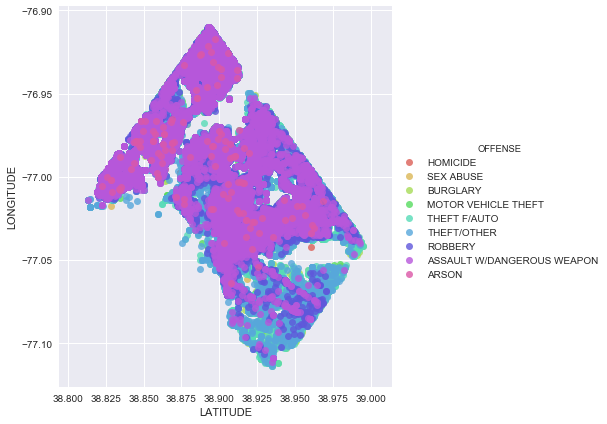

In [112]:
sns.lmplot(x='LATITUDE', y='LONGITUDE', data=all_crime, hue='OFFENSE', palette='hls', fit_reg=False, size=6)

** Apart from being more common, theft is also more prevalent across all areas of the city, wheras homicides are less frequent in certain neighborhoods, and cluster in others **

## Crime totals by weapon

In [121]:
gun_crimes = all_crime[all_crime['METHOD'] == 'GUN']
knife_crimes = all_crime[all_crime['METHOD'] == 'KNIFE']
other_crimes = all_crime[all_crime['METHOD'] == 'OTHERS']

In [123]:
gun_totals = gun_crimes['YEAR'].value_counts()
knife_totals = knife_crimes['YEAR'].value_counts()
other_totals = other_crimes['YEAR'].value_counts()

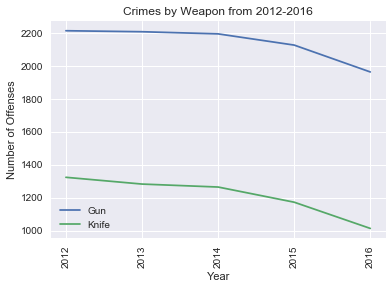

In [128]:
x = [1,2,3,4,5]
labels = ['2012', '2013', '2014', '2015', '2016']
plt.plot(x, gun_totals)
plt.plot(x, knife_totals)
#plt.plot(x, other_totals)
plt.xticks(x, labels, rotation='vertical')
plt.title('Crimes by Weapon from 2012-2016')
plt.xlabel('Year')
plt.ylabel('Number of Offenses')
plt.legend(['Gun', 'Knife'])